In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

from definer.data import graph

In [2]:
def get_amount0(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount0 = (liquidity * 2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals

    return amount0


def get_amount1(sqrtA, sqrtB, liquidity, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    amount1 = liquidity * (sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals

    return amount1


def get_amounts(asqrt, asqrtA, asqrtB, liquidity, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    if sqrt <= sqrtA:

        amount0 = get_amount0(sqrtA, sqrtB, liquidity, decimal0)
        return amount0, 0

    elif sqrtB > sqrt > sqrtA:
        amount0 = get_amount0(sqrt, sqrtB, liquidity, decimal0)

        amount1 = get_amount1(sqrtA, sqrt, liquidity, decimal1)

        return amount0, amount1

    else:
        amount1 = get_amount1(sqrtA, sqrtB, liquidity, decimal1)
        return 0, amount1


'''get_liquidity function'''


# Use 'get_liquidity' function to calculate liquidity as a function of amounts and price range
def get_liquidity0(sqrtA, sqrtB, amount0, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    liquidity = amount0 / ((2 ** 96 * (sqrtB - sqrtA) / sqrtB / sqrtA) / 10 ** decimals)
    return liquidity


def get_liquidity1(sqrtA, sqrtB, amount1, decimals):
    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    liquidity = amount1 / ((sqrtB - sqrtA) / 2 ** 96 / 10 ** decimals)
    return liquidity


def get_liquidity(asqrt, asqrtA, asqrtB, amount0, amount1, decimal0, decimal1):
    sqrt = (np.sqrt(asqrt * 10 ** (decimal1 - decimal0))) * (2 ** 96)
    sqrtA = np.sqrt(asqrtA * 10 ** (decimal1 - decimal0)) * (2 ** 96)
    sqrtB = np.sqrt(asqrtB * 10 ** (decimal1 - decimal0)) * (2 ** 96)

    if sqrtA > sqrtB:
        (sqrtA, sqrtB) = (sqrtB, sqrtA)

    if sqrt <= sqrtA:

        liquidity0 = get_liquidity0(sqrtA, sqrtB, amount0, decimal0)
        return liquidity0

    elif sqrtB > sqrt > sqrtA:

        liquidity0 = get_liquidity0(sqrt, sqrtB, amount0, decimal0)
        liquidity1 = get_liquidity1(sqrtA, sqrt, amount1, decimal1)
        liquidity = liquidity0 if liquidity0 < liquidity1 else liquidity1
        return liquidity

    else:
        liquidity1 = get_liquidity1(sqrtA, sqrtB, amount1, decimal1)
        return liquidity1


In [31]:
# address = "0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8"  # ETH USDC Ethereum
address = "0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640"  # USDC-ETH 0.05% Uniswap V3 pool on Ethereum chain
# Address = "0x2e9c575206288f2219409289035facac0b670c2f"  # ETH DAI Optimism
# Address= "0x68f180fcce6836688e9084f035309e29bf0a2095" #  WBTC DAI
# Address = "0x93f267fd92b432bebf4da4e13b8615bb8eb2095c"  # snx eth
# Address = "0xcb0c5d9d92f4f2f80cce7aa271a1e148c226e19d"  # Rai Dai

after = 1632081600

In [32]:
dpd = graph(address, after)
dpd.head()

2021-09-19 20:00:00


,periodStartUnix,liquidity,high,low,close,feeGrowthGlobal0X128,feeGrowthGlobal1X128,pool.totalValueLockedUSD,pool.totalValueLockedToken1,pool.totalValueLockedToken0,pool.token0.decimals,pool.token1.decimals
0,1.704517e+09,1.136631e+19,2250.326059,2240.810053,2241.039357,2.553447e+33,1.236565e+42,3.849723e+08,74577.746639,2.174527e+08,6.0,18.0
1,1.704514e+09,1.140782e+19,2256.429460,2249.283357,2249.292922,2.553440e+33,1.236556e+42,3.849723e+08,74577.746639,2.174527e+08,6.0,18.0
2,1.704510e+09,1.188786e+19,2257.596250,2253.624486,2255.242519,2.553434e+33,1.236548e+42,3.849723e+08,74577.746639,2.174527e+08,6.0,18.0
3,1.704506e+09,1.182950e+19,2258.830862,2254.339723,2257.536559,2.553423e+33,1.236541e+42,3.849723e+08,74577.746639,2.174527e+08,6.0,18.0
4,1.704503e+09,1.182948e+19,2264.589090,2256.399133,2256.530348,2.553410e+33,1.236537e+42,3.849723e+08,74577.746639,2.174527e+08,6.0,18.0


<AxesSubplot:xlabel='periodStartUnix', ylabel='close'>

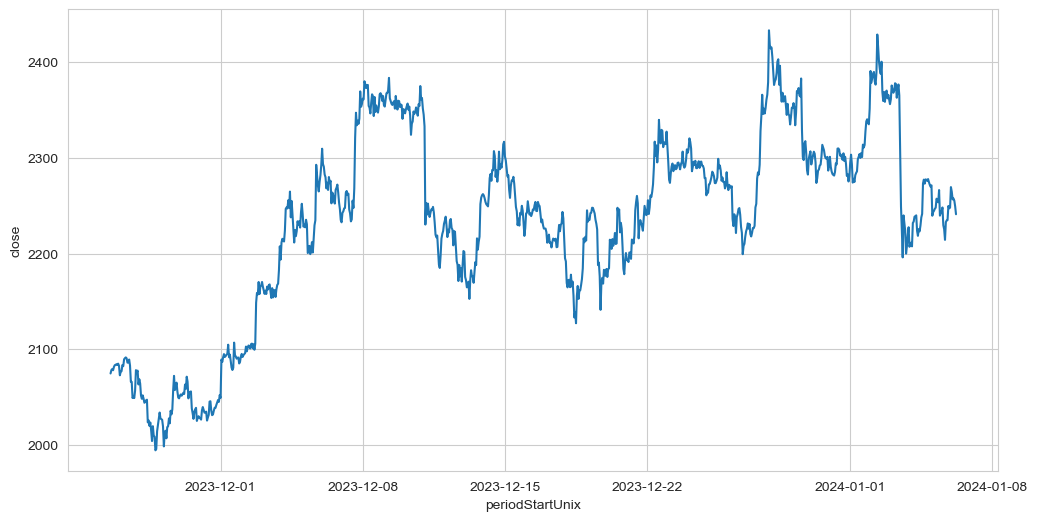

In [33]:
f = plt.figure(figsize=(12,6))
sns.lineplot(x=pd.to_datetime(dpd.periodStartUnix, unit='s'), y=dpd.close)

In [35]:
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.min()
).strftime('%Y-%m-%d %H:%M:%S'))
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.max()
).strftime('%Y-%m-%d %H:%M:%S'))

2023-11-25 14:00:00
2024-01-06 05:00:00


In [36]:
decimal0 = dpd.iloc[0]['pool.token0.decimals']
decimal1 = dpd.iloc[0]['pool.token1.decimals']
decimal = decimal1 - decimal0
print(decimal0, decimal1, decimal)

6.0 18.0 12.0


In [37]:
dpd['fg0'] = ((dpd['feeGrowthGlobal0X128']) / (2 ** 128)) / (10 ** decimal0)
dpd['fg1'] = ((dpd['feeGrowthGlobal1X128']) / (2 ** 128)) / (10 ** decimal1)

In [38]:
print(dpd['close'].iloc[-1])

2074.783697157969


In [39]:
mini = 1982.32
maxi = 2519.99
target = dpd['close'].iloc[-1]  # the initial price
# target = 2711.53
base = 0

Calculate F0G and F1G (fee earned by an unbounded unit of liquidity in one period):

In [40]:
dpd['fg0shift'] = dpd['fg0'].shift(-1)
dpd['fg1shift'] = dpd['fg1'].shift(-1)
dpd['fee0token'] = dpd['fg0'] - dpd['fg0shift']
dpd['fee1token'] = dpd['fg1'] - dpd['fg1shift']

Calculate my liquidity:

In [41]:
SMIN = np.sqrt(mini * 10 ** decimal)
SMAX = np.sqrt(maxi * 10 ** decimal)
print(SMIN, SMAX)

44523252.35200142 50199501.98956161


In [42]:
print(datetime.utcfromtimestamp(
    dpd.periodStartUnix.iloc[-1]
).strftime('%Y-%m-%d %H:%M:%S'))

2023-11-25 14:00:00


In [43]:
dpd['close'].iloc[-1]

2074.783697157969

In [44]:
if base == 0:

    sqrt0 = np.sqrt(dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = dpd['close']

else:

    sqrt0 = np.sqrt(1 / dpd['close'].iloc[-1] * 10 ** decimal)
    dpd['price0'] = 1 / dpd['close']


if SMIN < sqrt0 < SMAX:

    deltaL = target / ((sqrt0 - SMIN) + (((1 / sqrt0) - (1 / SMAX)) * (dpd['price0'].iloc[-1] * 10 ** decimal)))
    amount1 = deltaL * (sqrt0 - SMIN)
    amount0 = deltaL * ((1 / sqrt0) - (1 / SMAX)) * 10 ** decimal

elif sqrt0 < SMIN:

    deltaL = target / (((1 / SMIN) - (1 / SMAX)) * (dpd['price0'].iloc[-1]))
    amount1 = 0
    amount0 = deltaL * ((1 / SMIN) - (1 / SMAX))

else:
    deltaL = target / (SMAX - SMIN)
    amount1 = deltaL * (SMAX - SMIN)
    amount0 = 0
    
print("Amounts:", amount0, amount1)

Amounts: 0.8043032882047211 406.0283472202663


In [45]:
# print(dpd['price0'].iloc[-1],mini,maxi)
# print((dpd['price0'].iloc[-1],mini,maxi,amount0,amount1,decimal0,decimal1))
myliquidity = get_liquidity(dpd['price0'].iloc[-1], mini, maxi, amount0, amount1, decimal0, decimal1)

print("OK myliquidity", myliquidity)

OK myliquidity 395530474140538.75


In [46]:
# Calculate ActiveLiq

dpd['ActiveLiq'] = 0
dpd['amount0'] = 0
dpd['amount1'] = 0
dpd['amount0unb'] = 0
dpd['amount1unb'] = 0

if base == 0:
    
    for i, row in dpd.iterrows():
        if dpd['high'].iloc[i] > mini and dpd['low'].iloc[i] < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (min(maxi, dpd['high'].iloc[i]) - max(dpd['low'].iloc[i],
                                                                                                  mini)) / (
                                                                        dpd['high'].iloc[i] - dpd['low'].iloc[i]) * 100
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts(dpd['price0'].iloc[i], mini, maxi, myliquidity, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[0]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0, decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[1]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[0]
        
else:
    
    for i, row in dpd.iterrows():

        if (1 / dpd['low'].iloc[i]) > mini and (1 / dpd['high'].iloc[i]) < maxi:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = (min(maxi, 1 / dpd['low'].iloc[i]) - max(
                1 / dpd['high'].iloc[i], mini)) / ((1 / dpd['low'].iloc[i]) - (1 / dpd['high'].iloc[i])) * 100
        else:
            dpd.iloc[i, dpd.columns.get_loc('ActiveLiq')] = 0

        amounts = get_amounts((dpd['price0'].iloc[i] * 10 ** (decimal)), mini, maxi, myliquidity, decimal0,
                                        decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0')] = amounts[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1')] = amounts[1]

        amountsunb = get_amounts((dpd['price0'].iloc[i]), 1.0001 ** (-887220), 1.0001 ** 887220, 1, decimal0,
                                           decimal1)
        dpd.iloc[i, dpd.columns.get_loc('amount0unb')] = amountsunb[0]
        dpd.iloc[i, dpd.columns.get_loc('amount1unb')] = amountsunb[1]

In [47]:
## Final fee calculation

dpd['myfee0'] = dpd['fee0token'] * myliquidity * dpd['ActiveLiq'] / 100
dpd['myfee1'] = dpd['fee1token'] * myliquidity * dpd['ActiveLiq'] / 100

print(dpd['myfee0'].sum())
print(dpd['myfee1'].sum())

63.46872149345924
0.028052456590127617


In [48]:
if base == 0:
    
    dpd['feeV'] = (dpd['myfee0']) + (dpd['myfee1'] * dpd['close'])
    dpd['amountV'] = (dpd['amount0']) + (dpd['amount1'] * dpd['close'])
    dpd['amountunb'] = (dpd['amount0unb']) + (dpd['amount1unb'] * dpd['close'])
    dpd['fgV'] = (dpd['fee0token']) + (dpd['fee1token'] * dpd['close'])
    dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (
        dpd['pool.totalValueLockedToken0'].iloc[0])))

else:

    dpd['feeV'] = (dpd['myfee0'] / dpd['close']) + dpd['myfee1']
    dpd['amountV'] = (dpd['amount0'] / dpd['close']) + dpd['amount1']
    dpd['feeVbase0'] = dpd['myfee0'] + (dpd['myfee1'] * dpd['close'])
    dpd['amountunb'] = (dpd['amount0unb'] / dpd['close']) + dpd['amount1unb']
    dpd['fgV'] = (dpd['fee0token'] / dpd['close']) + dpd['fee1token']
    dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                dpd['pool.totalValueLockedToken1'].iloc[0] + (
                    dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0])))

dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

### 1 Chart

In [49]:
# dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
# rint(dpd['fg1']/dpd['amount1unb'])

data = dpd[['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1', 'close']]
data = data.fillna(0)

temp = data.resample('D', on='date').sum()
final1 = temp[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()

temp2 = data.resample('D', on='date').mean()
final1['ActiveLiq'] = temp2['ActiveLiq'].copy()

temp3 = data.resample('D', on='date').first()
final1[['amountV', 'amountunb']] = temp3[['amountV', 'amountunb']].copy()
temp4 = data.resample('D', on='date').last()
final1[['amountVlast']] = temp4[['amountV']]

final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
final1['multiplier'] = final1['S1%'] / final1['unb%']
final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100
final1.to_csv("chart1.csv", sep=";")

print("this position returned", final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, "in ", len(final1.index),
      " days, for an apr of ", final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)
print("a base  position returned", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, "in ",
      len(final1.index), " days, for an apr of ",
      final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)

print("fee in token 1 and token 2", dpd['myfee0'].sum(), dpd['myfee1'].sum())
print("totalFee in USD", final1['feeusd'].sum())
print('Your liquidity was active for:', final1['ActiveLiq'].mean())
# forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
# print(dpd['feeVbase0'])
# print('forecast: ', forecast)

this position returned 6.100859734395661 in  43  days, for an apr of  51.786367512893406
a base  position returned 0.35389967268024464 in  43  days, for an apr of  3.004032105309053
fee in token 1 and token 2 63.46872149345924 0.028052456590127617
totalFee in USD 126.70731368888504
Your liquidity was active for: 100.0


In [50]:
final1[['feeunb', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'S1%', 'unb%', 'ActiveLiq']]

,feeunb,feeV,feeusd,amountV,ActiveLiq,S1%,unb%,ActiveLiq
date,,,,,,,,
2023-11-25,0.011365,0.197375,0.197574,2074.783697,100.0,0.009513,0.000548,100.0
2023-11-26,0.071702,1.243830,1.245085,2081.122968,100.0,0.059767,0.003445,100.0
2023-11-27,0.109010,1.894889,1.896800,2069.883047,100.0,0.091546,0.005266,100.0
2023-11-28,0.108519,1.897658,1.899572,2040.192060,100.0,0.093014,0.005319,100.0
2023-11-29,0.089952,1.567936,1.569517,2055.620366,100.0,0.076276,0.004376,100.0
2023-11-30,0.066155,1.158194,1.159362,2034.766704,100.0,0.056920,0.003251,100.0
2023-12-01,0.099931,1.742604,1.744362,2053.596191,100.0,0.084856,0.004866,100.0
2023-12-02,0.107395,1.860556,1.862433,2088.790175,100.0,0.089073,0.005141,100.0
2023-12-03,0.096249,1.656046,1.657716,2140.176591,100.0,0.077379,0.004497,100.0


<AxesSubplot:xlabel='date', ylabel='feeusd'>

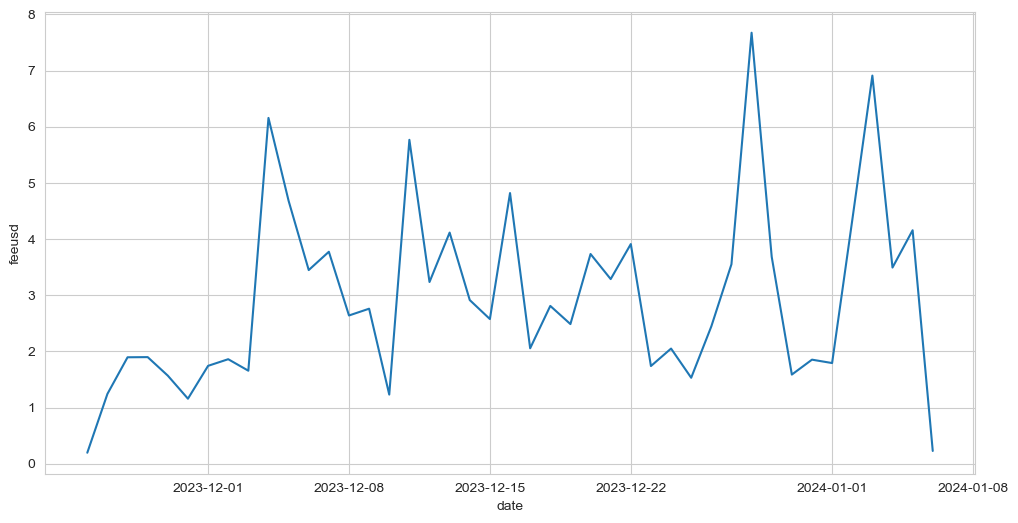

In [51]:
f = plt.figure(figsize=(12,6))
sns.lineplot(x=final1.index, y=final1.feeusd)

## 2 chart

In [52]:
final2 = temp3[['amountV', 'amount0', 'amount1', 'close']].copy()
final2['feeV'] = temp['feeV'].copy()
final2[['amountVlast']] = temp4[['amountV']]

final2['HODL'] = final2['amount0'].iloc[0] + final2['amount1'].iloc[0] * final2['close']

final2['IL'] = final2['amountVlast'] - final2['HODL']
final2['ActiveLiq'] = temp2['ActiveLiq'].copy()
final2['feecumsum'] = final2['feeV'].cumsum()
final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100
ch2 = final2[['amountV', 'feecumsum']]
ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

final2.to_csv("chart2.csv", sep=";")

In [53]:
final2

,amountV,amount0,amount1,close,feeV,amountVlast,HODL,IL,ActiveLiq,feecumsum,PNL,HODLnorm,ILnorm,PNLnorm,feecumsumnorm
date,,,,,,,,,,,,,,,
2023-11-25,2074.783697,406.028347,0.804303,2074.783697,0.197375,2082.901786,2074.783697,8.118089,100.0,0.197375,8.315463,100.000000,0.391274,0.400787,0.009513
2023-11-26,2081.122968,440.573015,0.787685,2082.747741,1.243830,2065.418539,2081.189204,-15.770665,100.0,1.441205,-14.329460,100.308731,-0.760111,-0.690648,0.069463
2023-11-27,2069.883047,379.761556,0.816982,2068.738273,1.894889,2034.381657,2069.921343,-35.539685,100.0,3.336094,-32.203592,99.765645,-1.712934,-1.552142,0.160792
2023-11-28,2040.192060,227.922294,0.891004,2033.964624,1.897658,2053.194383,2041.952782,11.241600,100.0,5.233752,16.475352,98.417622,0.541820,0.794076,0.252255
2023-11-29,2055.620366,305.338471,0.853106,2051.657354,1.567936,2035.247755,2056.183103,-20.935348,100.0,6.801688,-14.133660,99.103492,-1.009038,-0.681211,0.327826
2023-11-30,2034.766704,201.395739,0.904065,2027.919857,1.158194,2056.148619,2037.090956,19.057662,100.0,7.959882,27.017544,98.183293,0.918537,1.302186,0.383649
2023-12-01,2053.596191,295.006400,0.858145,2049.291627,1.742604,2084.477442,2054.280341,30.197101,100.0,9.702486,39.899587,99.011783,1.455434,1.923072,0.467638
2023-12-02,2088.790175,483.258790,0.767239,2092.609735,1.860556,2139.185279,2089.121238,50.064041,100.0,11.563042,61.627083,100.691038,2.412976,2.970290,0.557313
2023-12-03,2140.176591,801.561349,0.617760,2166.883879,1.656046,2156.052795,2148.860177,7.192619,100.0,13.219088,20.411707,103.570323,0.346668,0.983799,0.637131


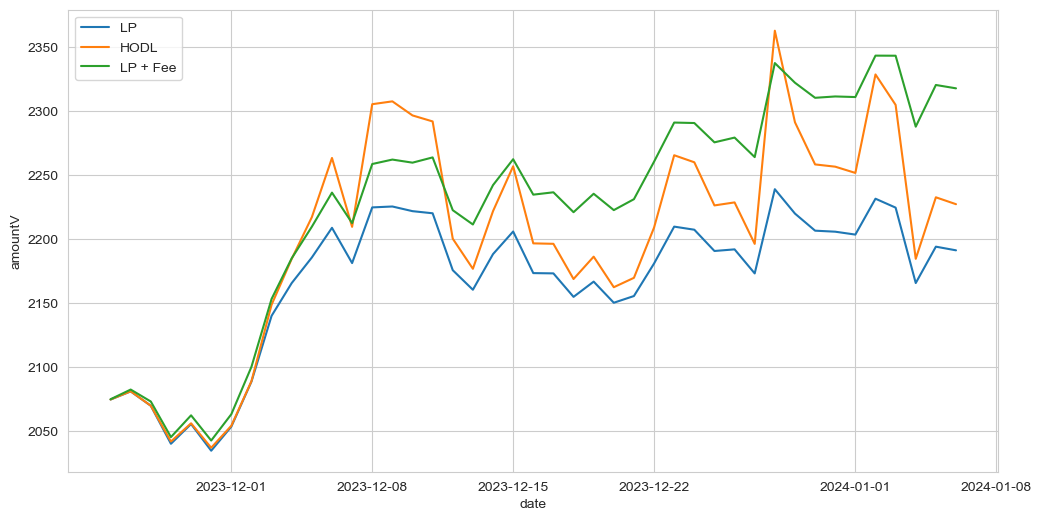

In [54]:
f2 = plt.figure(figsize=(12,6))
sns.lineplot(x=final2.index, y=final2.amountV, label='LP')
sns.lineplot(x=final2.index, y=final2.HODL, label='HODL')
sns.lineplot(x=final2.index, y=final2.amountV + final2.feecumsum, label='LP + Fee')
plt.legend()

In [ ]:
# final3=data
final3 = pd.DataFrame()
final3['amountV'] = data['amountV']

final3['amountVlast'] = data['amountV'].shift(-1)
final3['date'] = data['date']
final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
final3['IL'] = final3['amountVlast'] - final3['HODL']
final3['feecumsum'] = data['feeV'][::-1].cumsum()
final3['PNL'] = final3['feecumsum'] + final3['IL']
final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

ch2 = final3[['amountV', 'feecumsum']]
ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

In [84]:
def chart1(dpd, base, myliquidity):
    if base == 0:
        dpd['feeV'] = (dpd['myfee0']) + (dpd['myfee1'] * dpd['close'])
        dpd['amountV'] = (dpd['amount0']) + (dpd['amount1'] * dpd['close'])
        dpd['amountunb'] = (dpd['amount0unb']) + (dpd['amount1unb'] * dpd['close'])
        dpd['fgV'] = (dpd['fee0token']) + (dpd['fee1token'] * dpd['close'])
        dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                    dpd['pool.totalValueLockedToken1'].iloc[0] * dpd['close'].iloc[0] + (
            dpd['pool.totalValueLockedToken0'].iloc[0])))

    else:

        dpd['feeV'] = (dpd['myfee0'] / dpd['close']) + dpd['myfee1']
        dpd['amountV'] = (dpd['amount0'] / dpd['close']) + dpd['amount1']
        dpd['feeVbase0'] = dpd['myfee0'] + (dpd['myfee1'] * dpd['close'])
        dpd['amountunb'] = (dpd['amount0unb'] / dpd['close']) + dpd['amount1unb']
        dpd['fgV'] = (dpd['fee0token'] / dpd['close']) + dpd['fee1token']
        dpd['feeusd'] = dpd['feeV'] * (dpd['pool.totalValueLockedUSD'].iloc[0] / (
                    dpd['pool.totalValueLockedToken1'].iloc[0] + (
                        dpd['pool.totalValueLockedToken0'].iloc[0] / dpd['close'].iloc[0])))

    dpd['date'] = pd.to_datetime(dpd['periodStartUnix'], unit='s')

    # 1 Chart

    # dpd['fgV']= (dpd['fg0'] / dpd['close'].iloc[0] + dpd['fg1'])
    # rint(dpd['fg1']/dpd['amount1unb'])

    data = dpd[
        ['date', 'myfee0', 'myfee1', 'fgV', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'amountunb', 'amount0', 'amount1',
         'close']]
    data = data.fillna(0)

    temp = data.resample('D', on='date').sum()
    final1 = temp[['myfee0', 'myfee1', 'feeV', 'fgV', 'feeusd']].copy()

    temp2 = data.resample('D', on='date').mean()
    final1['ActiveLiq'] = temp2['ActiveLiq'].copy()

    temp3 = data.resample('D', on='date').first()
    final1[['amountV', 'amountunb']] = temp3[['amountV', 'amountunb']].copy()
    temp4 = data.resample('D', on='date').last()
    final1[['amountVlast']] = temp4[['amountV']]

    final1['S1%'] = final1['feeV'] / final1['amountV'] * 100  # *365
    final1['unb%'] = final1['fgV'] / final1['amountunb'] * 100  # *365
    final1['multiplier'] = final1['S1%'] / final1['unb%']
    final1['feeunb'] = final1['amountV'] * final1['unb%'] / 100
    final1.to_csv("chart1.csv", sep=";")

    print(final1[['feeunb', 'feeV', 'feeusd', 'amountV', 'ActiveLiq', 'S1%', 'unb%', 'ActiveLiq']])

    print('------------------------------------------------------------------')
    print("this position returned", final1['feeV'].sum() / final1['amountV'].iloc[0] * 100, "in ", len(final1.index),
          " days, for an apr of ", final1['feeV'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)
    print("a base  position returned", final1['feeunb'].sum() / final1['amountV'].iloc[0] * 100, "in ",
          len(final1.index), " days, for an apr of ",
          final1['feeunb'].sum() / final1['amountV'].iloc[0] * 365 / len(final1.index) * 100)

    print("fee in token 1 and token 2", dpd['myfee0'].sum(), dpd['myfee1'].sum())
    print("totalFee in USD", final1['feeusd'].sum())
    print('Your liquidity was active for:', final1['ActiveLiq'].mean())
    forecast = (dpd['feeVbase0'].sum() * myliquidity * final1['ActiveLiq'].mean())
    print(dpd['feeVbase0'])
    print('forecast: ', forecast)
    print('------------------------------------------------------------------')
    # 1 chart e' completo

    # 2 chart

    final2 = temp3[['amountV', 'amount0', 'amount1', 'close']].copy()
    final2['feeV'] = temp['feeV'].copy()
    final2[['amountVlast']] = temp4[['amountV']]

    final2['HODL'] = final2['amount0'].iloc[0] / final2['close'] + final2['amount1'].iloc[0]

    final2['IL'] = final2['amountVlast'] - final2['HODL']
    final2['ActiveLiq'] = temp2['ActiveLiq'].copy()
    final2['feecumsum'] = final2['feeV'].cumsum()
    final2['PNL'] = final2['feecumsum'] + final2['IL']  # -Bfinal['gas']

    final2['HODLnorm'] = final2['HODL'] / final2['amountV'].iloc[0] * 100
    final2['ILnorm'] = final2['IL'] / final2['amountV'].iloc[0] * 100
    final2['PNLnorm'] = final2['PNL'] / final2['amountV'].iloc[0] * 100
    final2['feecumsumnorm'] = final2['feecumsum'] / final2['amountV'].iloc[0] * 100
    ch2 = final2[['amountV', 'feecumsum']]
    ch3 = final2[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

    final2.to_csv("chart2.csv", sep=";")
    print(ch2)
    print(ch3)

    # final3=data
    final3 = pd.DataFrame()
    final3['amountV'] = data['amountV']

    final3['amountVlast'] = data['amountV'].shift(-1)
    final3['date'] = data['date']
    final3['HODL'] = data['amount0'].iloc[0] / data['close'] + data['amount1'].iloc[0]

    final3['amountVlast'].iloc[-1] = final3['HODL'].iloc[-1]
    final3['IL'] = final3['amountVlast'] - final3['HODL']
    final3['feecumsum'] = data['feeV'][::-1].cumsum()
    final3['PNL'] = final3['feecumsum'] + final3['IL']
    final3['HODLnorm'] = final3['HODL'] / final3['amountV'].iloc[0] * 100
    final3['ILnorm'] = final3['IL'] / final3['amountV'].iloc[0] * 100
    final3['PNLnorm'] = final3['PNL'] / final3['amountV'].iloc[0] * 100
    final3['feecumsumnorm'] = final3['feecumsum'] / final3['amountV'].iloc[0] * 100

    ch2 = final3[['amountV', 'feecumsum']]
    ch3 = final3[['ILnorm', 'PNLnorm', 'feecumsumnorm']]

    print(ch2)
    print(ch3)


In [83]:
a = chart1(dpd, base, myliquidity)

NameError: name 'chart1' is not defined

In [ ]:
# '''
# query ($fromdate: Int!){
#   poolHourDatas(
#     where: {pool: "''' + str(Adress) + '''",, periodStartUnix_gt: $fromdate},
#     orderBy: periodStartUnix,
#     orderDirection: desc,
#     first: 1000
#   ) {
#     periodStartUnix
#     liquidity
#     low
#     pool {
#       totalValueLockedUSD
#       totalValueLockedToken1
#       totalValueLockedToken0
#       token0 {
#         decimals
#       }
#       token1 {
#         decimals
#       }
#     }
#     close
#     feeGrowthGlobal0X128
#     feeGrowthGlobal1X128
#   }
# }
# '''